In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

In [2]:
#import supplied csv datafile
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

In [3]:
#df.info() for a summary of the data
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

In [4]:
# use df.head() to print first few rows of database
ski_data.head(10)

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
5,Yosemite Ski & Snowboard Area,Northern California,California,7800,600,7200,0,0.0,0,0,...,0.4,88.0,NaN,110.0,84.0,300.0,47.0,47.0,107.0,NaN
6,Bear Mountain,Sierra Nevada,California,8805,1665,7140,0,0.0,0,2,...,1.5,198.0,198.0,122.0,76.0,100.0,NaN,NaN,130.0,NaN
7,Bear Valley,Sierra Nevada,California,8500,1900,6600,0,0.0,1,1,...,1.2,1680.0,100.0,165.0,52.0,359.0,NaN,NaN,151.0,NaN
8,Boreal Mountain Resort,Sierra Nevada,California,7700,500,7200,0,0.0,0,1,...,1.0,380.0,200.0,150.0,54.0,400.0,49.0,NaN,150.0,200.0
9,Dodge Ridge,Sierra Nevada,California,8200,1600,6600,0,0.0,0,0,...,2.0,862.0,NaN,NaN,69.0,350.0,78.0,78.0,140.0,NaN


In [5]:
#review only Big Mountain Resort data and use .T property to better view data
ski_data[ski_data['Name'] =='Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0.0
fastSixes,0
fastQuads,3


In [6]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([ski_data.isnull().sum(), 100*ski_data.isnull().mean()], axis = 1)
missing.columns=['count','%']
missing.sort_values(by=['count','%'],ascending = False)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
TerrainParks,51,15.454545
daysOpenLastYear,51,15.454545
AdultWeekend,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


In [7]:
# use select_dtype() to select columns of dtype "object"
ski_data.select_dtypes(include = 'object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [8]:
#Find duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain            2
Blue Knob                   1
Lookout Pass Ski Area       1
Wildcat Mountain            1
Snowshoe Mountain Resort    1
Name: Name, dtype: int64

In [9]:
#Is Crystal Mountain a duplicate across Region and State or are they 2 resorts with the same name?
(ski_data['Name']+ ',' + ski_data['Region']).value_counts().head()

Suicide Six,Vermont              1
Welch Village,Minnesota          1
Brantling Ski Slopes,New York    1
Marquette Mountain,Michigan      1
Ski Ward,Massachusetts           1
dtype: int64

In [10]:
(ski_data['Name'] + ',' + ski_data['state']).value_counts().head()

Mt. Bachelor,Oregon                1
Bradford Ski Area,Massachusetts    1
Nordic Valley Resort,Utah          1
Boyne Mountain Resort,Michigan     1
Welch Village,Minnesota            1
dtype: int64

In [11]:
ski_data[ski_data['Name']=='Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [12]:
#does Region always = state
(ski_data.Region != ski_data.state).value_counts()

False    297
True      33
dtype: int64

In [13]:
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
New Hampshire          16
Wisconsin              16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
Maine                   9
New Mexico              9
Wyoming                 8
Utah                    7
Oregon                  6
North Carolina          6
Salt Lake City          6
Ohio                    5
Connecticut             5
Illinois                4
Virginia                4
West Virginia           4
Mt. Hood                4
Alaska                  3
Iowa                    3
Indiana                 2
Arizona                 2
Missouri                2
South Dakota            2
Nevada                  2
New Jersey              2
Maryland                1
Rhode Island            1
Tennessee               1
Northern California     1
Name: Region

In [14]:
#filter for rows where Region != State
(ski_data[ski_data.Region != ski_data.state].groupby(by=['state'])['Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

In [15]:
#calculate the number unique values in 'Region' and 'state'
ski_data[['Region','state']].nunique()

Region    38
state     35
dtype: int64

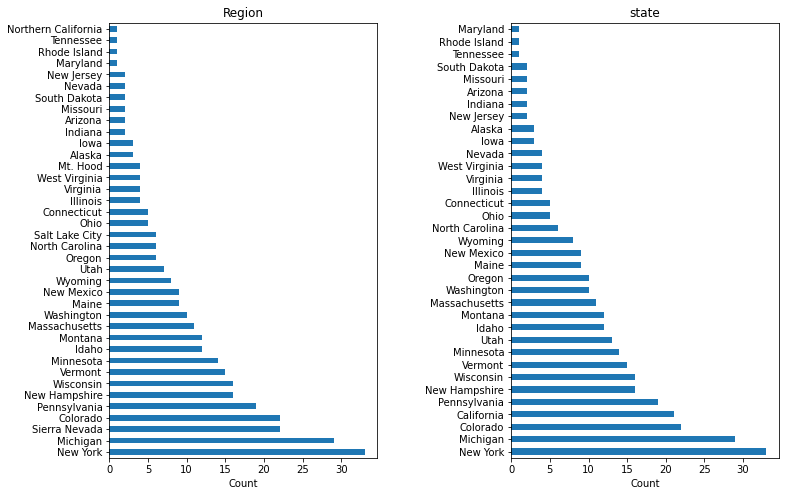

In [16]:
#visualization of resorts by Region and state
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(12,8))

ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Region')
ax[0].set_xlabel('Count')

ski_data.state.value_counts().plot(kind="barh", ax=ax[1])
ax[1].set_title('state')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5)

In [17]:
#Distribution of Ticket Price by state
#Average weekend and weekday price by state
state_price_means = ski_data.groupby(by='state')[['AdultWeekday','AdultWeekend']].mean()
state_price_means.head()


,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


Text(0.5, 0, 'Price($)')

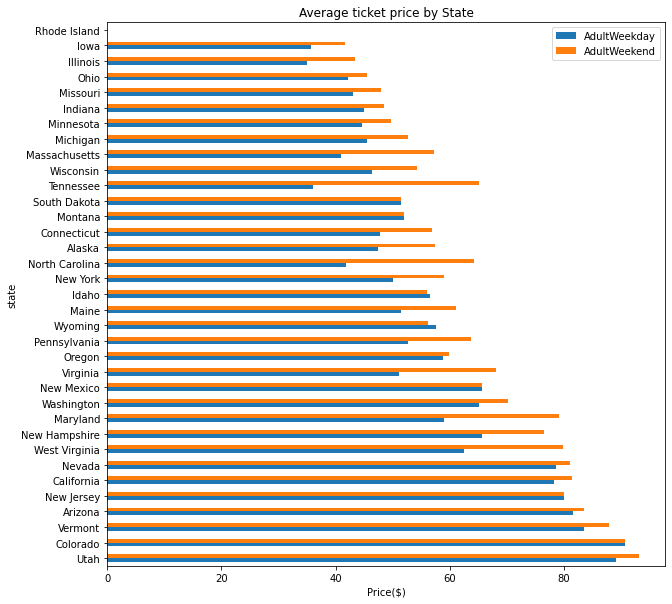

In [18]:
#reorder index and plot prices by state
(state_price_means.reindex(index=state_price_means.mean(axis=1).sort_values(ascending=False).index)
 .plot(kind='barh', figsize =(10,10), title ='Average ticket price by State'))
plt.xlabel('Price($)')

In [19]:
#Distribution of prices by state using pd.melt() for 'state', 'AdultWeekday' and 'AdultWeekend'
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], id_vars='state', var_name='Ticket', 
                        value_vars=['AdultWeekday' , 'AdultWeekend'],value_name='Price')
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


Text(0.5, 0, 'State')

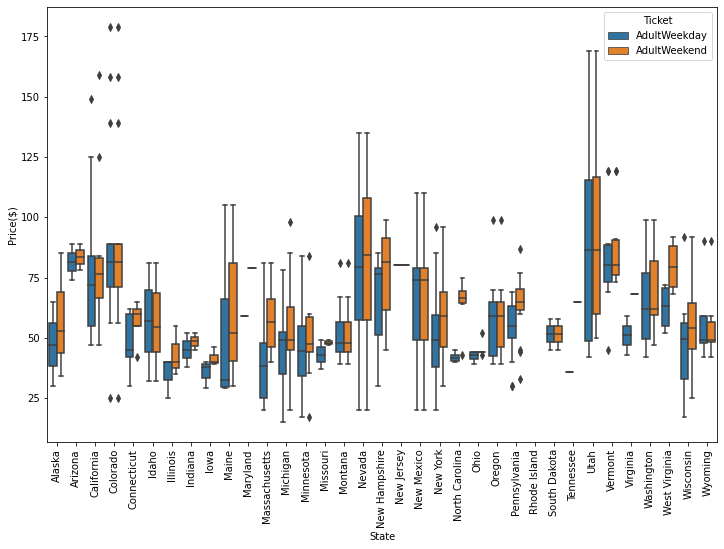

In [20]:
#create boxplot of ticket_prices
plt.subplots(figsize=(12,8))
sns.boxplot(x='state', y='Price', hue= 'Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price($)')
plt.xlabel('State')

In [21]:
#use .describe() for stat summary of numerical columns
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [22]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

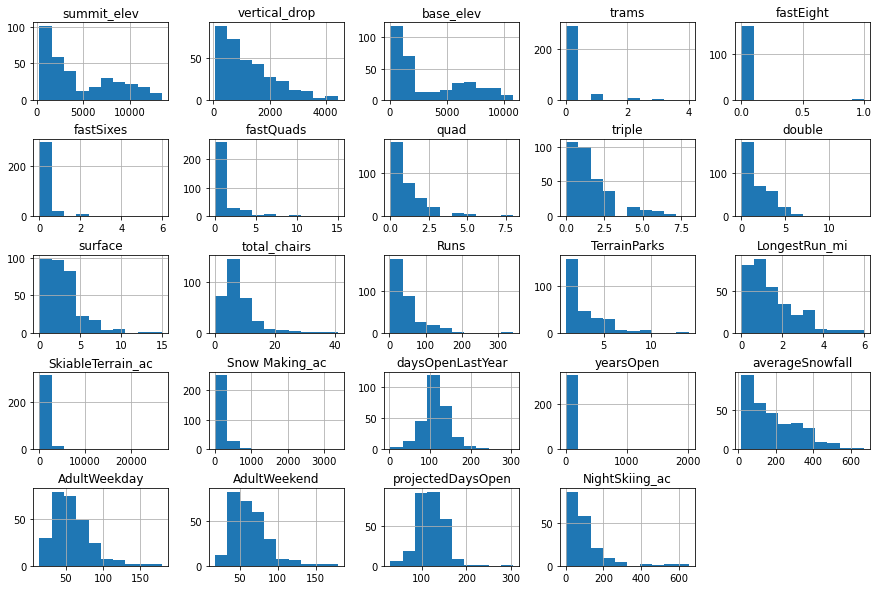

In [23]:
#Distribution of Feature Values
## .hist() for numerical features , create legible, easy to read plots
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [24]:
#filter 'SkiableTerrain_ac' to print values larger than 0
ski_data.loc[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.0
fastSixes,0
fastQuads,0


In [25]:
#correct SkiableTerrain_ac for Silverton Mountain. (Would normally feed error back to client/data owner as a query). 
#data correction for Silvertion, SkiableTerrain_ac should be 1819, NOT 26819.
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [26]:
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [27]:
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

Text(0.5, 1.0, 'Distribution of skiable area (acres) after replacing erroneous value')

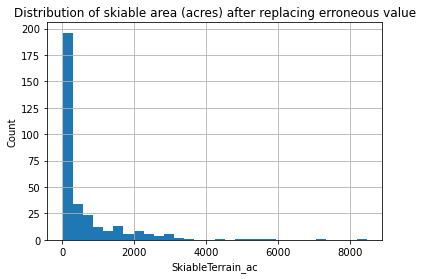

In [28]:
#review distribution for SkiableTerrain_ac
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value')

In [29]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [30]:
ski_data[ski_data['Snow Making_ac']>3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.0
fastSixes,2
fastQuads,7


In [31]:
#Heavenly Mountain is missing all ticket pricing information so further analysis is not helpful

In [32]:
#What are the counts for fastEight?
#Is this data useful?
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

In [33]:
#fastEight is missing too many values to be useful, drop the entire feature column
ski_data.drop(columns='fastEight', inplace=True)

In [34]:
#filter 'yearsOpen'
ski_data.loc[ski_data.yearsOpen > 100].T

,34,115
Name,Howelsen Hill,Pine Knob Ski Resort
Region,Colorado,Michigan
state,Colorado,Michigan
summit_elev,7136,1308
vertical_drop,440,300
base_elev,6696,1009
trams,0,0
fastSixes,0,0
fastQuads,0,0
quad,0,0


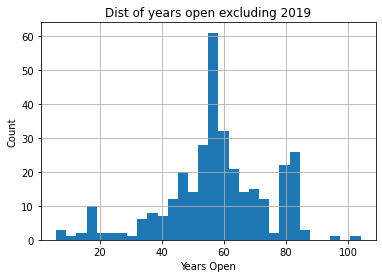

In [35]:
#Howelsen Hill opened 1915, Pine Knob Ski Resort opened unknown
ski_data.yearsOpen[ski_data.yearsOpen<2019].hist(bins=30)
plt.xlabel('Years Open')
plt.ylabel('Count')
plt.title('Dist of years open excluding 2019');

In [36]:
# exclude Pine Knob since we cannot determine yearsOpen
ski_data = ski_data[ski_data.yearsOpen < 1000]

In [37]:
#state-wide aggregations for market size analysis
state_summary = ski_data.groupby('state').agg(resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'),
                                             state_total_skiable_area=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
                                             state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
                                             state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
                                             state_total_night_skiing=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [38]:
#drop rows with no ticket price data
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100
ski_data=ski_data[missing_price!=2]


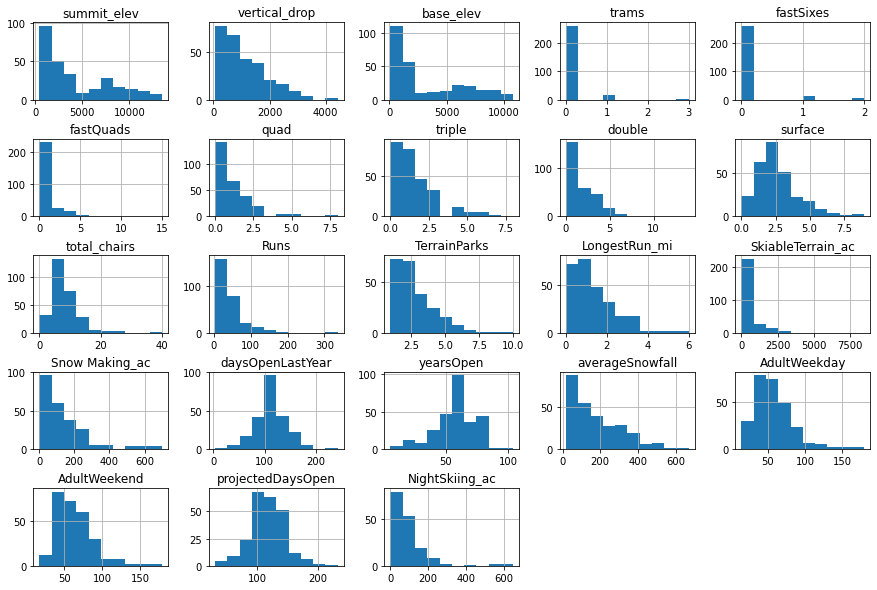

In [39]:
ski_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [40]:
#population data
#Use pandas' `read_html` method to read the table from the URL below
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [41]:
type(usa_states)

list

In [42]:
len(usa_states)

1

In [43]:
usa_states=usa_states[0]
usa_states.head()

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [44]:
# use iloc() to get dates
established=usa_states.iloc[:,4]
established

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

In [45]:
#use .iloc() to get columns 0,5,6 and rename them 'state', 'state_pop', and 'state_area_sq_miles'
usa_states_sub = usa_states.iloc[:, [0, 5, 6]].copy()
usa_states_sub.columns = ['state', 'state_pop', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_pop,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [46]:
#Find states in state_summary that are NOT in usa_states_sub
missing_states = set(state_summary.state)- set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Rhode Island', 'Virginia'}

In [47]:
#missing states use commonwealth and not state in name
usa_states_sub.state.replace(to_replace= '\[.*\]'  ,value= '' , regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts | Pennsylvania | Rhode Island | Virginia')]

47    West Virginia
Name: state, dtype: object

In [48]:
missing_states = set(state_summary.state)- set(usa_states_sub.state)
missing_states

set()

In [49]:
#merge state_summary and usa_states_sub
state_summary = state_summary.merge(usa_states_sub, how='left', on='state')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area,state_total_days_open,state_total_terrain_parks,state_total_night_skiing,state_pop,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


# Target Features

<AxesSubplot:xlabel='AdultWeekday', ylabel='AdultWeekend'>

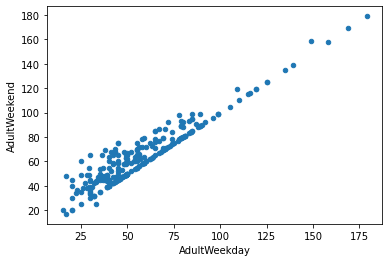

In [50]:
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter')

In [51]:
#use .loc() to get 'AdultWeekday' and 'AdultWeekend' pricing for Montana
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekday', 'AdultWeekend']]

,AdultWeekday,AdultWeekend
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In [52]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [53]:
#since 'AdultWeekend' is missing the least amount of data .drop() 'AdultWeekday' and drop rows missing data from 
#'AdultWeekend'
ski_data.drop(columns=['AdultWeekday'], inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [54]:
ski_data.shape

(277, 25)

# Number of Missing Values by Row-Resort

In [55]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100*ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head(10)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


In [56]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [57]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [58]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [59]:
ski_data.shape

(277, 25)

In [60]:
datapath = '../clean_data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../clean_data/ski_data_cleaned.csv"


In [61]:
datapath = '../clean_data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../clean_data/state_summary.csv"


Summary

The original data had 330 entries in 27 columns.Big Mountain Resort was one of these entries and had no NaN values. 

I ran pd.concat() to create the DataFrame, missing. This included a sum and % for all missing values for each resort (each column in the df). 

I then ran .value_counts() on the 'Name' column of the df to determine if there were any duplicate entries for a resort. After finding Crystal Mountain had two entries we filitered the df['Name'] for 'Crystal Mountain' so we could see if it was a duplicate value or two separate resorts with the same name. I found one in Michigan and one in Washington so there are unique values. 

I then did .value_counts for find how many, if any, instances of state != Region was in the data and found 33 instances of state not being equal to Region. I then filtered the df for those instances and .groupby('state') while doing a .value_counts() on Region. There are 38 unique Regions and 35 unique states.

I then looked into the distribution of ticket price by state, calculating the mean ticket price (AdultWeekday and AdultWeekend) by state and Region. I also did a horizontal bar chart of the average ticket prices by state, reindexed by increasing ticket prices. I performed pd.melt() to get the ticket prices df with the columns of state, Ticket, and price so that I could use seaborn to create a box plot of the ticket prices. CA, CO, and UT have the most expensive tickets, outside those states the prices mostly lie between $25 and $100. Some states, NC and VA notably, have a distinct increase in weekend prices vs weekday prices. There is a state to state difference in the difference between weekend and weekday prices overall. 

While 16% of resorts are lacking price data I don't know yet if that is 1 value or both values. missing_price was created as a sum  of the missing value for AdultWeekend and AdultWeekday, .value_counts()/len(missing_price) was used to determine the percent of resorts missing 0, 1, and 2 values from the ticket pricing columns. 82% have both values, 3% have either a weekend or weekday price, and 14% of resorts have no pricing information. I will eventually drop those records but want to use them to do a distribtion based on features first. 

I did a set of histogram plots of the features to determine the distribution of those features and see if there was anything suspect in the data associated with those features. For SkiableTerrain_ac, Snow Making_ac, fastEight, and yearsOpen  I delved further in the data using a mix of filtering, invesigation of the correct value, replacing data, dropping columns, and dropping an entire resort from the data. I created a df, state_summary, that included all the market share information, skiable days, SkiableTerrain_ac, terrain_parks, and NightSkiing.
I then dropped all resorts missing both ticket prices as they were no longer useful.

I pulled in the data for the states from wikipedia and saved in the the usa_states df. I extracted the data for state name, population, and square miles  as usa_states_sub. This was not including all the states in the ski_data df as 4 states are actually "commonwealths". After fixing that so all states data was included I merged the state_summary and usa_state_sub dataframes on state using a left join. 

I then investigated the relationship between weekday and weekend prices, how many of each value was missing, and which price to focus the analysis on. I dropped weekday prices because I was missing few values and the distribution of both prices in Montana seems equal. 

A final data check was performed that showed a curious pattern of missing values but everything was left as is for the further analysis. 


